In [1]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df = pd.read_csv('poker_hand_test.data')

In [3]:
df.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [4]:
df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']

df.head()

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [6]:
df.isnull().sum()

first_suit     0
first_rank     0
second_suit    0
second_rank    0
third_suit     0
third_rank     0
fourth_suit    0
fourth_rank    0
fifth_suit     0
fifth_rank     0
hand           0
dtype: int64

In [7]:
df.describe()

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,2.500495,6.997933,2.499895,7.006091,2.500872,6.998876,2.500394,7.002302,2.499452,6.989476,0.616903
std,1.117767,3.743371,1.118568,3.743478,1.118225,3.741891,1.117246,3.741270,1.118948,3.739893,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [9]:
X =df.drop(columns=['hand'])

In [10]:
X

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank
0,3,12,3,2,3,11,4,5,2,5
1,1,9,4,6,1,4,3,2,3,9
2,1,4,3,13,2,13,2,1,3,6
3,3,10,2,7,1,2,2,11,4,9
4,1,3,4,5,3,4,1,12,4,6
...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6
999995,3,3,4,5,2,7,1,4,4,3
999996,1,11,4,7,3,9,1,13,2,7
999997,3,11,1,8,1,1,3,13,2,8


In [11]:
y =df['hand']

In [14]:
from yellowbrick.classifier import ClassBalance,ROCAUC,ClassPredictionError

In [13]:
!pip install yellowbrick

     -------------------------------------- 271.4/271.4 KB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 13.3/13.3 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


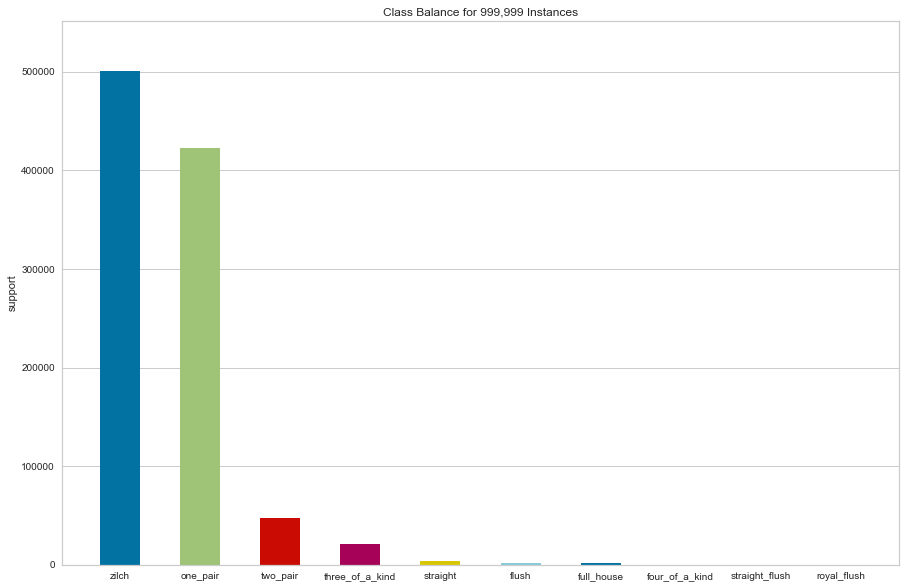

<AxesSubplot:title={'center':'Class Balance for 999,999 Instances'}, ylabel='support'>

In [15]:
balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

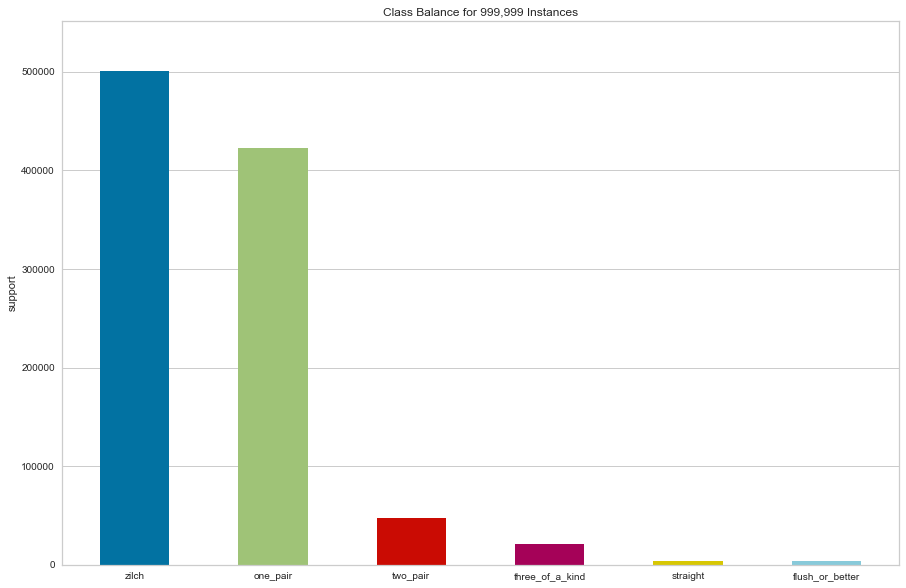

<AxesSubplot:title={'center':'Class Balance for 999,999 Instances'}, ylabel='support'>

In [17]:
df.loc[df['hand']>=5, 'hand'] = 5

y = df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#CLF = SVC()
CLF = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')

CLF.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')